<a href="https://colab.research.google.com/github/Magudarena/Machine_learning/blob/main/MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
(trainX, trainY),(testX, testY) = mnist.load_data()

In [ ]:
trainX.shape

(60000, 28, 28)

In [ ]:
trainX=trainX.reshape(-1,28*28)
testX=testX.reshape(-1,28*28)

In [ ]:
trainX.shape

(60000, 784)

In [ ]:
trainX_01=trainX.astype('float32')/255
testX_01=testX.astype('float32')/255 #standaryzacja danych do wartości między 0 a 1

In [ ]:
testY

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from keras.utils import to_categorical

In [ ]:
trainY=to_categorical(trainY)
testY=to_categorical(testY)
#Konwertuje wektor klasy (liczby całkowite) na macierz binarną klasy
#zamienimy Y (tensor treningowy) za pomocą gorącej jedynki na wektory dziesięcioelementowe

In [ ]:
trainY.shape

(60000, 10)

In [ ]:
trainY[23]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from keras import models
from keras import layers

In [ ]:
def mnist1(): #model sieci neuronowej w funkcji
    model=models.Sequential()
    model.add(layers.Dense(512,activation='relu', input_shape=(28*28,))) #musimy robić warstwy rosnąco albo malejąco - coraz bardziej/mniej gęste
    model.add(layers.Dense(256,activation='relu'))
    model.add(layers.Dense(10,activation='softmax'))
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    #optymalizator operuje na tensorach, oblicza gradient (odpowiednik pochodnej funkcji kwadratowej) i dzięki temu zbliża się do minimum
    #poruszamy się w kierunku przeciwnym do kierunku gradientu
    return model

In [ ]:
model=mnist1()

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
512*(784+1) #dodawany jest nowy neuron per każdy neuron na początku żeby zapobiegać przeuczeniu - to tak zwany Bias


401920

In [ ]:
256*(512+1) #druga warstwa sieci neuronowej + Bias

131328

In [ ]:
10*(256+1) #ostatnia warstwa sieci neuronowej + Bias

2570

In [ ]:
history=model.fit(trainX,trainY,epochs=15,batch_size=256)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7918 - loss: 18.0555
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9331 - loss: 0.4411
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9514 - loss: 0.2661
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9612 - loss: 0.1862
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9677 - loss: 0.1542
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9713 - loss: 0.1327
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9758 - loss: 0.1139
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9785 - loss: 0.1100
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9799 - loss: 0.1001
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9830 - loss: 0.0862
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9824 - loss: 0.0922
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt

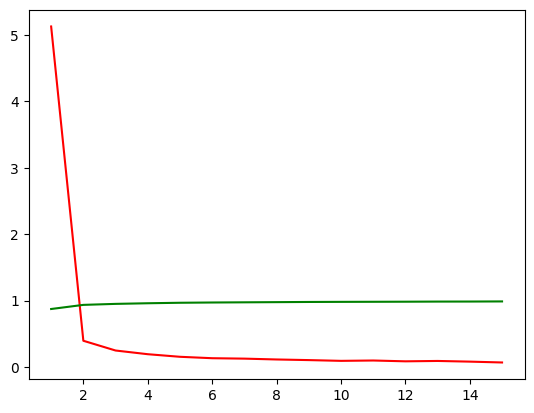

In [ ]:
loss=history.history['loss']
accuracy=history.history['accuracy']
plt.plot(range(1,16),loss,'r',label='strata') #w range w pythonie ostatnia wartość nie wchodzi do zakresu
plt.plot(range(1,16),accuracy,'g',label='Poprawność trenowania')

In [ ]:
loss[2:]

[0.24898457527160645,
 0.19334876537322998,
 0.1544434279203415,
 0.13309188187122345,
 0.1267080307006836,
 0.11409904062747955,
 0.10466823726892471,
 0.09325511753559113,
 0.09853629767894745,
 0.08625108003616333,
 0.09183220565319061,
 0.08164680749177933,
 0.06886211782693863]

In [ ]:
test_loss,test_accuracy=model.evaluate(testX,testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9715 - loss: 0.3505


In [ ]:
test_loss

0.30142107605934143

In [ ]:
test_accuracy

0.9750999808311462

In [ ]:
model.save('mnist.keras')

In [ ]:
x=models.load_model('mnist.keras')

In [ ]:
pred=x(testX[3450].reshape(1,28*28)) #+ oznacza przesunięcie przecinka w prawo, - w lewo

In [ ]:
pred

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.0000000e+00, 0.0000000e+00, 6.0331436e-22, 9.8382917e-29,
        6.0559479e-37, 6.9937884e-23, 4.0395658e-15, 1.2997744e-32,
        2.6656478e-20, 7.3846057e-37]], dtype=float32)>

In [ ]:
testY[3450] #model rozpoznał tę cyfrę jako zero, bo na pierwszym miejscu jest 0

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
import numpy as np

In [ ]:
np.argmax(pred) #pokazuje numer jako który zidentyfikował - tutaj jest to zero

np.int64(0)

In [ ]:
#koniec?